# Parte 4: Modelo de regresión lineal múltiple - implementación
En este último archivo, se emplea el dataset generado en el 3° archivo de la tarea. Se aplica un modelo de regresión lineal múltiple Elastic Net, ya que éste combina las penalizaciones que emplean los modelos de regresión Ridge y Lasso. <br>
Antes de implementar el modelo de regresión, se hace uso de la función integrada en la librería de _pandas_ para convertir aquellas varibales categóricas en variables _dummies_. Una vez realizado esto, se separa el set de datos en uno de entrenamiento y otro de testing en proporción 70-30, para finalmente, entrenar el modelo y posteriormente testearlo empleando el conjunto de datos de testing.

In [69]:
# Librerias necesarias
get_ipython().magic('matplotlib inline')

import pandas as pd # Manipulación de datos
import seaborn as sns # Graficos
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
df = pd.read_excel("DataCASEN2017_RGLM.xlsx")
df.head()

,region,zona,sexo,edad,e1,e6a,o4,oficio1,rama1,y1,s5,r1a,ytrabajocor,esc,activ
0,Región de Tarapacá,Urbano,Hombre,24,"Sí, lee y escribe",Educación Media Científico-Humanista,No sabe/no responde,Trabajadores de los servicios y vendedores de ...,Hoteles y restaurantes,270000,0,Chilena (Exclusiva),281750,12,Ocupados
1,Región de Tarapacá,Urbano,Hombre,28,"Sí, lee y escribe",Educación Media Científico-Humanista,No sabe/no responde,Trabajadores de los servicios y vendedores de ...,Hoteles y restaurantes,300000,0,Otra nacionalidad. Especifique país,311750,12,Ocupados
2,Región de Tarapacá,Urbano,Mujer,59,"Sí, lee y escribe",Educación Media Científico-Humanista,No sabe/no responde,Operadores de instalaciones y máquinas y monta...,Comercio al por mayor y al por menor,270000,17,Chilena (Exclusiva),595000,12,Ocupados
3,Región de Tarapacá,Urbano,Mujer,23,"Sí, lee y escribe",Técnico Nivel Superior Completo (Carreras 1 a ...,No sabe/no responde,Técnicos profesionales de nivel medi,Enseñanza,270000,22,Chilena (Exclusiva),540000,14,Ocupados
4,Región de Tarapacá,Urbano,Hombre,23,"Sí, lee y escribe",Educación Media Técnica Profesional,No sabe/no responde,Trabajadores de los servicios y vendedores de ...,Hoteles y restaurantes,270000,22,Chilena (Exclusiva),540000,12,Ocupados


In [71]:
print("===================================================================")
print("Tamaño del dataframe:")
print(df.shape)
print("===================================================================")
print("Cantidad de valores nulos por columna:")
print(df.isna().sum())
print("===================================================================")
print("Tipo de variable de las columnas:")
print(df.dtypes)
print("===================================================================")

Tamaño del dataframe:
(64225, 15)
Cantidad de valores nulos por columna:
region         0
zona           0
sexo           0
edad           0
e1             0
e6a            0
o4             0
oficio1        0
rama1          0
y1             0
s5             0
r1a            0
ytrabajocor    0
esc            0
activ          0
dtype: int64
Tipo de variable de las columnas:
region         object
zona           object
sexo           object
edad            int64
e1             object
e6a            object
o4             object
oficio1        object
rama1          object
y1              int64
s5              int64
r1a            object
ytrabajocor     int64
esc             int64
activ          object
dtype: object


__Se crean las varibales dummies para las columnas que son variables de tipo categóricas__

In [72]:
# Variables dummies
columnas_cat = ["region", "zona", "sexo", "e1", "e6a", "o4", "oficio1", "rama1", "r1a","activ"]
df_completo = pd.get_dummies(df, columns = columnas_cat)
df_completo

,edad,y1,s5,ytrabajocor,esc,region_Región Metropolitana de Santiago,region_Región de Antofagasta,region_Región de Arica y Parinacota,region_Región de Atacama,region_Región de Ayséndel Gral. Carlos Ibáñez del Campo,...,rama1_Servicios sociales y de salud,rama1_Sin dato,"rama1_Suministro de electricidad, gas y agua","rama1_Transporte, almacenamiento y comunicaciones",r1a_Chilena (Exclusiva),r1a_Chilena y otra (Doble nacionalidad),r1a_Otra nacionalidad. Especifique país,activ_Desocupados,activ_Inactivos,activ_Ocupados
0,24,270000,0,281750,12,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,28,300000,0,311750,12,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,59,270000,17,595000,12,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,23,270000,22,540000,14,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,23,270000,22,540000,12,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64220,59,0,22,404167,11,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
64221,63,0,20,310000,12,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
64222,40,0,34,562500,8,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
64223,60,0,23,250000,3,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [73]:
df_completo.columns

Index(['edad', 'y1', 's5', 'ytrabajocor', 'esc',
       'region_Región Metropolitana de Santiago',
       'region_Región de Antofagasta', 'region_Región de Arica y Parinacota',
       'region_Región de Atacama',
       'region_Región de Ayséndel Gral. Carlos Ibáñez del Campo',
       'region_Región de Coquimbo', 'region_Región de La Araucanía',
       'region_Región de Los Lagos', 'region_Región de Los Ríos',
       'region_Región de Magallanes y de la Antártica Chilena',
       'region_Región de Tarapacá', 'region_Región de Valparaíso',
       'region_Región de Ñuble', 'region_Región del Biobío',
       'region_Región del Libertador Gral. Bernardo O’Higgins',
       'region_Región del Maule', 'zona_Rural', 'zona_Urbano', 'sexo_Hombre',
       'sexo_Mujer', 'e1_No sabe/responde', 'e1_No, ninguno',
       'e1_No, sólo escribe', 'e1_No, sólo lee', 'e1_Sí, lee y escribe',
       'e6a_Educación Básica', 'e6a_Educación Especial (Diferencial)',
       'e6a_Educación Media Científico-Humanist

In [74]:
# Se copian las variables independientes a X (todas menos escolaridad) y la dependiente a Y (escolaridad)
X = df_completo.drop("esc", axis = 1) # variables independientes
Y = df_completo["esc"]

In [75]:
# se divide la muestra de datos en un set de entreamiento y otro de prueba (70 - 30)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 5)
print("===============================================================")
print("Tamaño de datos de entrenamiento: ")
print("X: ",X_train.shape)
print("Y: ",Y_train.shape)
print("===============================================================")
print("Tamaño de datos de testing: ")
print("X: ",X_test.shape)
print("T: ",Y_test.shape)
print("===============================================================")

Tamaño de datos de entrenamiento: 
X:  (44957, 83)
Y:  (44957,)
Tamaño de datos de testing: 
X:  (19268, 83)
T:  (19268,)


In [76]:
# Implementacion del modelo de regresion elastic net
en = ElasticNet(alpha=0.01,l1_ratio=0.01)
en.fit(X_train,Y_train)
Y_pred_train = en.predict(X_train) # predicciones para el set de entrenamiento
Y_pred = en.predict(X_test) # predicciones para el set de testing 

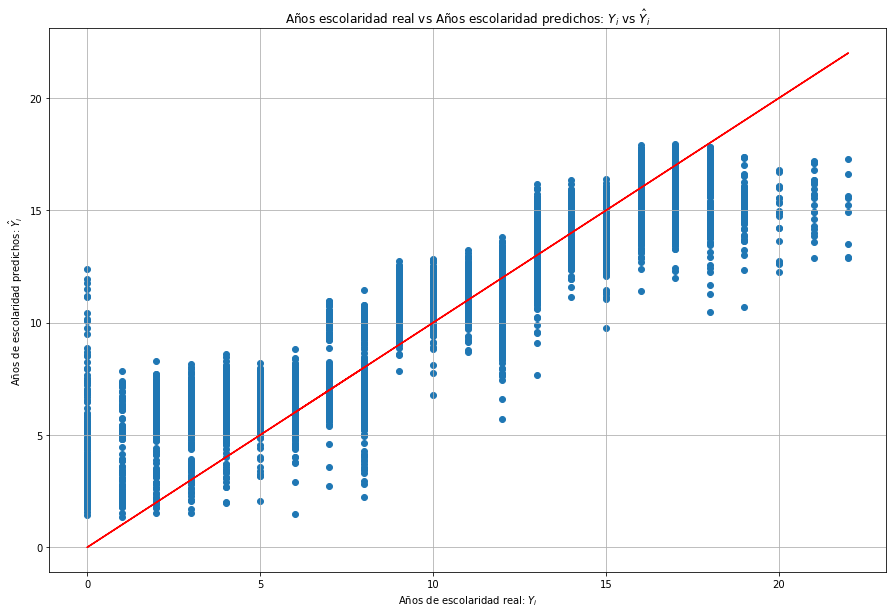

In [97]:
plt.rc('figure', figsize=(15,10))
plt.plot(Y_test, Y_test, color="red")
plt.scatter(Y_test,Y_pred)
plt.grid()
plt.xlabel("Años de escolaridad real: $Y_i$")
plt.ylabel("Años de escolaridad predichos: $\hat{Y}_i$")
plt.title("Años escolaridad real vs Años escolaridad predichos: $Y_i$ vs $\hat{Y}_i$")
plt.show()

### Comparación en tabla de los valores reales versus los predichos
Se crea un dataframe de 2 columnas, una para los valores reales y otra para los valores predichos. Después, se añade una tercera columna categórica, en la que se coloca una identificación de si la predicción es correcta o no. Como la predicción resulta ser en valores decimales, se realiza una función de redondeo y posteriormente un casteo a entero, para que sea coherente con los datos de testing.

In [81]:
# Se convierte a un arrelo de numpy los datos de test reales
Y_test_arr =  Y_test.to_numpy()
# Se convierten y castean a entero los datos predichos
Y_pred_arr = np.round(Y_pred, decimals = 0)
Y_pred_arr = Y_pred_arr.astype(int)
print("===================================================")
print("Datos reales: ")
print(Y_test_arr)
print("===================================================")
print("Datos predichos: ")
print(Y_pred_arr)
print("===================================================")

Datos reales: 
[ 6 12 16 ...  8 12  8]
Datos predichos: 
[ 7 13 18 ...  7 12  8]


In [83]:
# Creacion del dataframe
df_resultados_esc = pd.DataFrame({"Y_test": Y_test_arr, "Y_pred": Y_pred_arr})
df_resultados_esc.head(30)

,Y_test,Y_pred
0,6,7
1,12,13
2,16,18
3,12,12
4,12,12
5,16,17
6,5,7
7,12,11
8,12,11
9,5,7


### Obtención de los coeficientes

In [21]:
#Obtenemos los coeficientes
print('Intercepto: ',en.intercept_) # Obtenemos el intercepto
print('Coeficientes: \n',en.coef_) # nuestros coeficientes

Intercepto:  10.657108692124702
Coefficientes: 
 [-3.17758056e-02 -2.31264268e-07  6.27203729e-03  1.33628337e-06
  2.38232609e-02 -1.10956148e-02  6.55965697e-02 -4.99595931e-02
 -2.06226417e-01  0.00000000e+00 -1.62056731e-02 -4.83063101e-02
  2.78558516e-02 -7.62649540e-02 -3.77512674e-02  1.24180475e-01
  5.80856125e-02  4.69074779e-02  4.78029209e-02  3.72675121e-02
 -1.74178834e-01  1.74178843e-01 -5.11388591e-02  5.11391257e-02
  6.28999023e-02 -1.56532594e+00  7.83525903e-02 -1.97421598e-01
  1.61139403e+00 -4.09984088e+00 -4.21446199e-01 -4.95265411e-02
  1.34650877e-01 -3.16103651e-01 -5.13497055e-02 -3.99015834e+00
  2.11689743e+00  1.18909786e+00 -1.64814354e-01 -4.25179418e+00
  3.85650447e+00  2.50020147e+00 -1.62700671e-01 -2.63091160e-01
  2.48385673e+00  1.51991988e+00 -2.26747546e-01  1.25077610e-01
  9.15688490e-02 -4.24329346e-01  8.61720519e-02 -2.54004924e-02
  4.14247035e-02 -2.78963777e-01 -2.00257035e-01  8.46828330e-01
 -1.60679397e-01 -1.31680374e-01  2.67087

In [96]:
# Se retira la notación científica de los coeficientes para mejor legibilidad
np.set_printoptions(suppress=True)
print("Coeficientes:")
print(en.coef_)

Coeficientes:
[-0.03183887 -0.00000024  0.00622476  0.00000132  0.02826684 -0.00372017
  0.06531348 -0.0314619  -0.21688044  0.00096283 -0.01484132 -0.03673813
  0.0320313  -0.06989882 -0.02438889  0.11772358  0.02776977  0.04352093
  0.03886559  0.02327334 -0.17059953  0.17059954 -0.04597234  0.04597265
  0.07900891 -1.57538539  0.0835773  -0.17447781  1.577176   -4.10717675
 -0.38820303 -0.05103413  0.13520366 -0.32854071 -0.0600151  -3.97401156
  2.17133159  1.14455976 -0.18924395 -4.26783176  3.86192502  2.49691041
 -0.16263091 -0.25734954  2.48729954  1.51911051 -0.2325935   0.12310447
  0.09938795 -0.40273136  0.0823836  -0.0205619   0.03972887 -0.28398907
 -0.20512698  0.85622294 -0.17668029 -0.13504801  0.2660043   0.17943567
  0.09274307 -0.17662098 -0.08372085 -0.16293779  0.22788831 -0.00168326
 -0.10374126 -0.06298145 -0.          0.0327552  -0.          0.05169456
 -0.13206786  0.12084536 -0.00593706  0.00544743  0.02482679 -0.0614052
  0.07992978 -0.00842357  0.16371069 -

### Interpretación de los coeficientes
Gracias a la penalización que provee el modelo elastic net, se pueden detectar 2 variables que no son interpretadas por el modelo. También hay otras variables que aportan de manera baja o "cercana" a cero, como lo _-0.00000024_ o _0.00000132_ ubicadas en la primera fila del listado de coeficientes. Quedaría pendiente de observar a qué variables corresponden dichos coeficientes.

<hr>

### MSE (Error cuadrático promedio) del modelo

In [91]:
mse = mean_squared_error(Y_train,Y_pred_train)
print("======================================================")
print('Mean Squared Error, training:',mse)
print("======================================================")

mse = mean_squared_error(Y_test,Y_pred)
print('Mean Squared Error: ',mse)
print("======================================================")

rsq = r2_score(Y_train,Y_pred_train)
print("\n")
print("======================================================")
print('R-square, Training: ',rsq)

rsq = r2_score(Y_test,Y_pred)
print("======================================================")
print('R-square, Testing: ',rsq)
print("======================================================")

Mean Squared Error, training: 1.9439094714420062
Mean Squared Error:  1.9312310683102436


R-square, Training:  0.8657677014797134
R-square, Testing:  0.8668183753150748


El MSE del modelo desarrollado con la librería _statsmodels_ es de 1.25, mientras que el MSE del modelo desarrollado con _sklearn_ es de 1.94. Esto quiere decir que aparentemente el modelo desarrollado con _statsmodels_ está más cerca de los valores reales que el desarrollado con _sklearn_.